# Import packages

In [28]:
import random
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Version 1: without use of functions and classes

### define variables

In [91]:
length = 20
time = 20
rule_number = 38
state = 3 #This indicates this is a n-state system. You can change this to any number to get a n-state syatem.

### define an initial condition

In [92]:
initial_condition = []
for i in range(length):
    initial_condition.append(random.randint(0,state-1))
print(initial_condition)

[0, 2, 0, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1]


### define neighborhood values

In [93]:
count = 0
neighborhoods = []
for i in range(state):
    for j in range(state):
        neighborhoods.append((i,j))
        count+=1

In [95]:
neighborhoods

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

### convert the rule number to n-state number

In [94]:
print(np.base_repr(rule_number, base=state))
print(np.base_repr(rule_number, base=state)[::-1])

1102
2011


### build the lookup table dictionary

In [96]:
in_ternary = np.base_repr(rule_number, base=state)[::-1]
lookup_table ={}
for i in range(state**2):
    key = neighborhoods[i]
    try:
        val = in_ternary[i]
    except IndexError:
        val = '0'
    lookup_table.update({key: val})
for key, val in lookup_table.items():
    print(key, '-->', val)

(0, 0) --> 2
(0, 1) --> 0
(0, 2) --> 1
(1, 0) --> 1
(1, 1) --> 0
(1, 2) --> 0
(2, 0) --> 0
(2, 1) --> 0
(2, 2) --> 0


### calculate the following rows by using the lookup table

In [97]:
spacetime_field = [initial_condition]
current_configuration = initial_condition.copy()
for t in range(time):
    new_configuration = []
    for i in range(len(current_configuration)):
        
        neighborhood = (current_configuration[(i-1)], 
                        current_configuration[i])
        
        new_configuration.append(int(lookup_table[neighborhood]))
    # update the current configuration    
    current_configuration = new_configuration # here we don't want to keep making new copies, so use '='
    # add the new configuration to the spacetime field
    spacetime_field.append(new_configuration)

In [98]:
spacetime_field

[[0, 2, 0, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 0],
 [0, 0, 1, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2],
 [0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2],
 [0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2],
 [0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0],
 [2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2],
 [0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
 [2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0],
 [2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2,

### make a plot

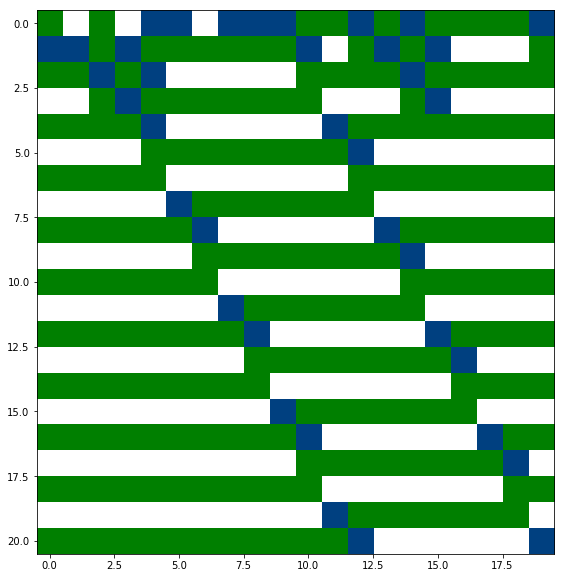

In [99]:
plt.figure(figsize=(10,10))
plt.imshow(spacetime_field, cmap=plt.cm.ocean, interpolation='nearest')
plt.show()

# Version 2: with use of functions and at least one class

In [141]:
def neighbor_for_nstate(state):
    count = 0
    neighborhoods = []
    for i in range(state):
        for j in range(state):
            neighborhoods.append((i,j))
            count+=1
    return neighborhoods
    
def lookuptable(state, rule_number, ifprint=False):
    in_ternary = np.base_repr(rule_number, base=state)[::-1]
    lookup_table ={}
    neighborhoods = neighbor_for_nstate(state)
    for i in range(state**2):
        key = neighborhoods[i]
        try:
            val = in_ternary[i]
        except IndexError:
            val = '0'
        lookup_table.update({key: val})
    if ifprint == True:
        for key, val in lookup_table.items():
            print(key, '-->', val)
    return lookup_table
class ECA(object):
    '''
    Elementary cellular automata simulator.
    '''
    def __init__(self, state, rule_number, initial_condition):
        for i in initial_condition:
            if i not in np.arange(state):
                raise ValueError("incorrect initial condition")
        self.lookup_table = lookuptable(state, rule_number)
        self.initial = initial_condition
        self.spacetime = [initial_condition]
        self.current_configuration = initial_condition.copy()
        self.state = state
        
        
    def evolve (self, time_steps, ifplot):
        for t in range(time_steps):
            new_configuration = []
            for i in range(len(self.initial)):
                
                neighborhood = (self.current_configuration[(i-1)], 
                                self.current_configuration[i])
                
                new_configuration.append(int(self.lookup_table[neighborhood]))
            # update the current configuration    
            self.current_configuration = new_configuration # here we don't want to keep making new copies, so use '='
            # add the new configuration to the spacetime field
            self.spacetime.append(new_configuration)
        if ifplot == True:
            plt.figure(figsize=(10,10))
            plt.imshow(self.spacetime, cmap=plt.cm.ocean, interpolation='nearest')
            plt.show()

# define a random initial contion

In [142]:
length = 20
time = 20
rule_number = 38
state = 3
initial_condition = []
for i in range(length):
    initial_condition.append(random.randint(0,state-1))
print(initial_condition)

[2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 0]


# rule number: 38     state number: 3

In [143]:
xx = ECA(state = 3, rule_number=38, initial_condition = initial_condition)

# Evolve 20 steps

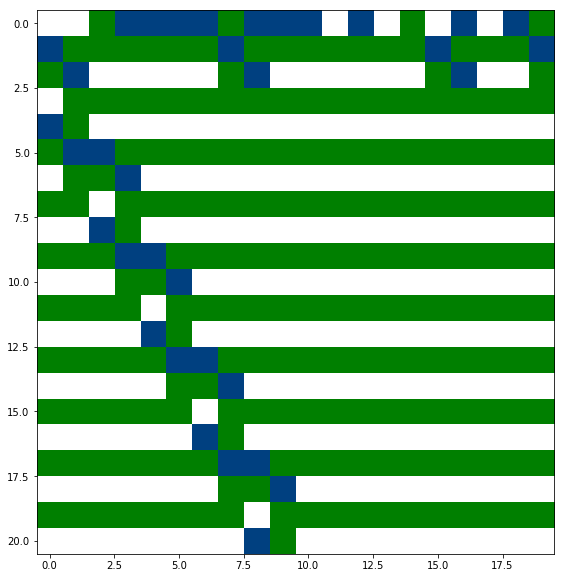

In [144]:
xx.evolve(20, ifplot = True)